<a href="https://colab.research.google.com/github/bonitr02/sqlite_database_operations/blob/main/hha504_assgn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages

In [100]:
! pip install sqlalchemy
from sqlalchemy import create_engine
import sqlite3
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [30]:
df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')

<ipython-input-30-00c9927208ca>:1: DtypeWarning: Columns (9,10,12,13,14,15,17,19,20,21,22,23,24,27,28,29,31,33,34,35,36,38,41,43,45,47,48,49,50,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/131624096_mount-sinai-queens_chargemaster.csv')


In [31]:
df.shape
#114893 rows and 55 columns

(114893, 55)

In [34]:
df.head(10)

,CHARGE CODE,CHARGE DESC,ALTERNATE DESCRIPTION,DEPARTMENT CODE,DEPARTMENT NAME,EFFECTIVE DATE,RATE CHARGED,TP RATE (340B),GENERAL CPT4 CODE,GENERAL MODIFER 1,...,BC IP MODIFIER2 EFF DATE,BC OP REV CODE,BC OP HCPCS CODE,BC OP HCPCS EFF DATE,BC OP MODIFIER1,BC OP MODIFIER1 EFF DATE,BC OP MODIFIER2,BC OP MODIFIER2 EFF DATE,REVENUE CODE INPATIENT,REVENUE CODE OUTPATIENT
0,10300300,NON ESRD HEMO INPT UNIT,NON ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,2150.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
1,10300500,NON ESRD HEMO ED IN DIALYS UNI,NON ESRD HEMO ED IN DIALYS UNI,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
2,10300600,INPT CAPD TREATMENT,INPT CAPD TREATMENT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,803.0,803.0
3,10300700,ESRD HEMO ED IN DIALYS UNIT,ESRD HEMO ED IN DIALYS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,G0257,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,821.0,821.0
4,10300800,ESRD HEMO INPT UNIT,ESRD HEMO INPT UNIT,103,DIALYSIS,12/1/18,1700.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
5,10301000,ESRD HEMO INPT DIALYSIS UNIT,ESRD HEMO INPT DIALYSIS UNIT,103,DIALYSIS,12/1/18,1500.0,0.0,90935,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,801.0
6,10303200,CCPD CYCLER INPT,CCPD CYCLER INPT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,804.0,804.0
7,10303400,NONESRD ULTRAFLTR IP DIALY UNI,NONESRD ULTRAFLTR IP DIALY UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
8,10304600,ESRD ULTRAFLTR INPT UNIT,ESRD ULTRAFLTR INPT UNIT,103,DIALYSIS,1/1/19,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0
9,10304700,ESRD ULTRAFLTR IP DIALYSIS UNI,ESRD ULTRAFLTR IP DIALYSIS UNI,103,DIALYSIS,12/1/18,1150.0,0.0,90945,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,881.0,881.0


In [ ]:
df.columns

## Data cleaning



In [ ]:
# Drop empty columns
df.dropna(how='all', axis=1, inplace=True)
print(df)

#Results in 114893 rows and 48 columns

In [ ]:
# Check for missing values in a column
print(df.isnull().sum())
# Results in only a few columns not missing values: CHARGE CODE, CHARGE DESC, ALTERNATE DESCRIPTION, DEPARTMENT CODE, DEPARTMENT NAME, EFFECTIVE DATE, RATE CHARGED, TP RATE (340B), REVENUE CODE INPATIENT, REVENUE CODE OUTPATIENT

In [ ]:
df.drop_duplicates(inplace=True)
# No duplicate rows identified

In [49]:
#Rename columns
newDF=df.rename(columns={'CHARGE CODE': 'CHARGEcode', 'CHARGE DESC':'CHARGEdesc', 'ALTERNATE DESCRIPTION': 'ALTdesc', 'DEPARTMENT CODE':'DEPTcode', 'DEPARTMENT NAME':'DEPTname', 'EFFECTIVE DATE':'EFFECTIVEdate', 'RATE CHARGED':'RATEcharged', "TP RATE (340B)":'TP_RATE_340B', 'REVENUE CODE INPATIENT':'REVENUEcodeINPT', 'REVENUE CODE OUTPATIENT':'REVENUEcodeOPT'})

In [ ]:
print(newDF)

In [66]:
df_msq=newDF[['CHARGEcode','CHARGEdesc','ALTdesc','DEPTcode','DEPTname','EFFECTIVEdate','RATEcharged','REVENUEcodeINPT','REVENUEcodeOPT']]

In [68]:
df_msq.to_csv('/content/cleaned_mount-sinai-queens_chargemaster.csv')

## Exploratory Analysis



#### Observations: A lot of missing columns and values; created new dataframe with clean data to remove null values

In [69]:
print(tabulate(df_msq.sample(5), headers='keys', tablefmt='grid'))

+-------+--------------+------------------------------+------------------------------+------------+---------------------+-----------------+---------------+-------------------+------------------+
|       |   CHARGEcode | CHARGEdesc                   | ALTdesc                      |   DEPTcode | DEPTname            | EFFECTIVEdate   |   RATEcharged |   REVENUEcodeINPT |   REVENUEcodeOPT |
+=======+==============+==============================+==============================+============+=====================+=================+===============+===================+==================+
| 18734 |     50000025 | SCREW HBS STD COMP 13MM TI   | SCREW HBS STD COMP 13MM TI   |        500 | OR SUPPLIES A00     | 1/1/10          |         616   |               278 |              278 |
+-------+--------------+------------------------------+------------------------------+------------+---------------------+-----------------+---------------+-------------------+------------------+
| 37633 |     50022726 | 

In [72]:
df_msq.dtypes

CHARGEcode          object
CHARGEdesc          object
ALTdesc             object
DEPTcode            object
DEPTname            object
EFFECTIVEdate       object
RATEcharged        float64
REVENUEcodeINPT     object
REVENUEcodeOPT      object
dtype: object

In [ ]:
# Convert columns to strings
df_msq['CHARGEcode'] = df_msq['CHARGEcode'].apply(str)
df_msq['DEPTcode'] = df_msq['DEPTcode'].apply(str)
df_msq['REVENUEcodeINPT'] = df_msq['REVENUEcodeINPT'].apply(str)
df_msq['REVENUEcodeOPT'] = df_msq['REVENUEcodeOPT'].apply(str)

In [86]:
df_msq.describe()

,RATEcharged
count,114893.000000
mean,2051.366813
std,4404.024927
min,0.000000
25%,164.630000
50%,636.180000
75%,2226.000000
max,318000.000000


In [77]:
df_msq['CHARGEcode'].value_counts()

10300300    1
70019617    1
70019454    1
70019453    1
70019452    1
           ..
50024335    1
50024334    1
50024333    1
50024332    1
99899993    1
Name: CHARGEcode, Length: 114893, dtype: int64

In [78]:
df_msq['CHARGEdesc'].value_counts()

TIBIAL INSERT W SCREW             53
CATH PTA 142CM MARVERCK VARSZ     49
STEM 195MM STEM REST MOD CONI     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
CATH  ANGIO 14X2 5.8FR 75CM        1
CATH ANGIO 16X2 5.8FR 120CM        1
EXTRACTOR STONE RETR BLLN 8.5      1
EXTRACTOR RETRIEV BLLN 12-15M      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: CHARGEdesc, Length: 76586, dtype: int64

In [79]:
df_msq['ALTdesc'].value_counts()

TIBIAL INSERT W SCREW             53
STEM 195MM STEM REST MOD CONI     49
CATH PTA 142CM MARVERCK VARSZ     49
ERYTHROPOIETIN RECOMBINANT INJ    45
SPHINCTER   4.9F   .035/450       42
                                  ..
GRAFT HEMA MICROVEL22 X30CM        1
BALLOON  PULMONARY 8.5MM           1
CATH  CONTRA ANGIOG 5 FR 65        1
CATH ULTRA BLLN DIL 3X2  75CM      1
LEFT WITHOUT BEEN SEEN/ERRONEO     1
Name: ALTdesc, Length: 76591, dtype: int64

In [80]:
df_msq['DEPTcode'].value_counts()

700    47056
500    31710
184     7320
800     6480
415     4452
       ...  
162        2
626        1
310        1
994        1
998        1
Name: DEPTcode, Length: 75, dtype: int64

In [81]:
df_msq['DEPTname'].value_counts()

OR OPTIME SUPPLIES 700      47056
OR SUPPLIES A00             31710
PHARMACY                    11772
OR OPTIME SUPPLIES 800       6480
OR SUPPLIES X21- IR          4028
                            ...  
AMBULATORY SERV. TESTING        2
AMBULATORY SURGERY              2
BALANCE FORWARD                 1
ROOM & BOARD ICU                1
MISCELLANEOUS                   1
Name: DEPTname, Length: 71, dtype: int64

In [82]:
df_msq['RATEcharged'].value_counts()

1.00       952
300.00     717
0.00       677
250.00     612
500.00     573
          ... 
405.10       1
455.54       1
414.20       1
2582.00      1
220.64       1
Name: RATEcharged, Length: 15914, dtype: int64

In [83]:
df_msq['REVENUEcodeINPT'].value_counts()

278.0    82182
270.0     7830
250.0     7549
276.0     3221
636.0     2899
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeINPT, Length: 124, dtype: int64

In [84]:
df_msq['REVENUEcodeOPT'].value_counts()

278.0    82182
270.0     7830
250.0     7257
276.0     3221
636.0     3191
         ...  
381.0        1
389.0        1
385.0        1
303.0        1
271.0        1
Name: REVENUEcodeOPT, Length: 124, dtype: int64

In [99]:
# Data distribution

# Calculate mean, median, and mode
mean= df_msq['RATEcharged'].mean()
median = df_msq['RATEcharged'].median()
mode = df_msq['RATEcharged'].mode().iloc[0]
print("Mean is:", mean)
print("Median is:", median)
print("Mode is: ", mode)
# Calculate range
range  = df_msq['RATEcharged'].max() - df_msq['RATEcharged'].min()
print("Range is:", range)
# Calculate variance and standard deviation
variance = np.var(df_msq['RATEcharged'])
print("Variance is: ",variance)
std_dev = np.std(df_msq['RATEcharged'])
print("Standard Deviation is:", std_dev)

Mean is: 2051.366812512512
Median is: 636.18
Mode is:  1.0
Range is: 318000.0
Variance is:  19395266.741329383
Standard Deviation is: 4404.005760819277


In [102]:
# Remove outliers by only allowing data within 3 standard deviations
df_cleaned = df_msq[df_msq['RATEcharged']<= std_dev*3]

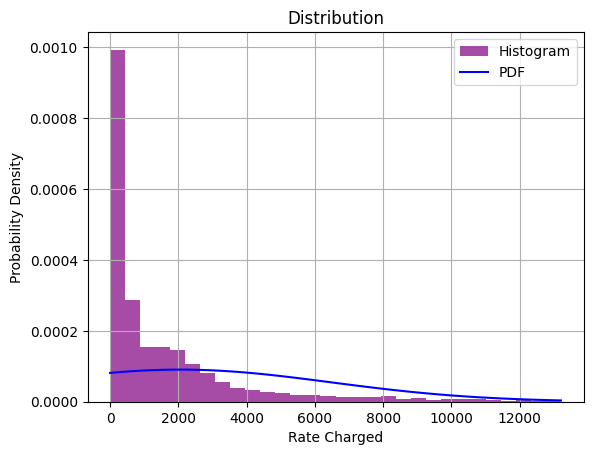

In [105]:
# Create a histogram
plt.hist(df_cleaned['RATEcharged'], bins=30, density=True, alpha=0.7, color='purple', label='Histogram')

# Create a probability density function (PDF) curve
x = np.linspace(min(df_cleaned['RATEcharged']), max(df_cleaned['RATEcharged']),100)
pdf = (1/(std_dev * np.sqrt(2*np.pi))) * np.exp(-(x - mean)**2 / (2*std_dev**2))
plt.plot(x, pdf, color='blue', label='PDF')

plt.title('Distribution')
plt.xlabel('Rate Charged')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [106]:
df_cleaned.to_csv('/content/outliers_rem_cleaned_mount-sinai-queens_chargemaster.csv')